In [1]:
import numpy as np
import h5py

import scipy.signal as sg
import matplotlib.pyplot as plt

import IPython

In [2]:
import importlib
import soundfeatures
importlib.reload(soundfeatures)

<module 'soundfeatures' from 'C:\\Workspace\\Projects\\Toolbox\\soundfeatures\\soundfeatures.py'>

## Load file with sound

In [3]:
dirpath = r'C:\Workspace\ProjectData\Speech Reconstruction\source-fiter model'
record_filename = '172851o.h5'

fs = 4096
sound_channel = 64
label_channel = 70

with h5py.File(dirpath + '/' + record_filename,'r+') as input_file:
    data = input_file['raw_data'][()]
    sound = (data[:, sound_channel]).astype("float64")
    label = (data[:, label_channel]).astype("int32")
    del data

print('sound', sound.shape[0] / fs, 's')

sound 333.75048828125 s


## Look at the whole sound ans small part

In [17]:
soundf = soundfeatures.butter_filter(sound, fs, order=4, freq=0.5, btype='highpass')
signal = soundf[665345:665345+12288]

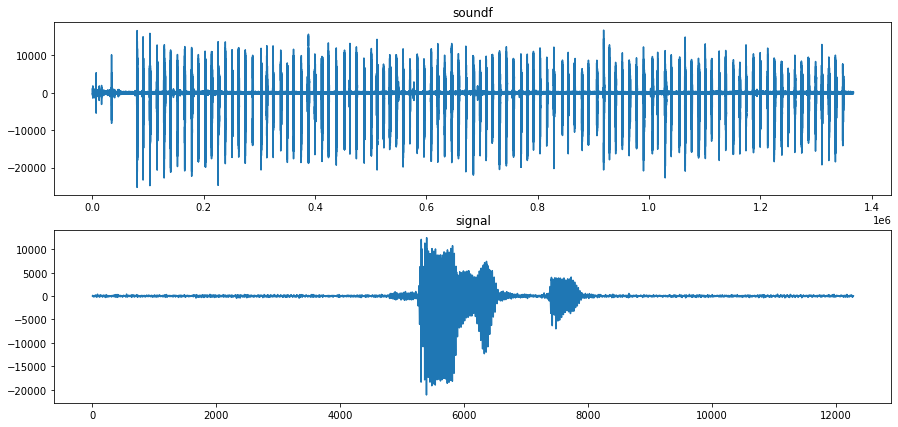

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(15, 7))
ax[0].plot(soundf)
ax[0].set_title('soundf')
ax[1].plot(signal)
ax[1].set_title('signal')
plt.show()

# Linear Predictive Coding

In [26]:
fs = 4096
frame = 128
step = 10
pad='center'

lpc_order = 10
lpc_window = 'hann'
# lpc_window = None

pitch_thr = 0.8

soundmask_freq = 2
soundmask_thr = 0.1

n_mel = 40
mel_fmin = 0
mel_fmax = 2048
n_mfcc = 10

## Small part

In [28]:
%%time
features = soundfeatures.make_sound_features(signal, fs, frame, step, pad=pad, 
                               lpc_order=lpc_order, lpc_window=lpc_window, 
                               pitch_thr=pitch_thr, 
                               soundmask_freq=soundmask_freq, soundmask_thr=soundmask_thr, 
                               n_mel=n_mel, mel_fmin=mel_fmin, mel_fmax=mel_fmax, n_mfcc=n_mfcc)

Wall time: 1.93 s


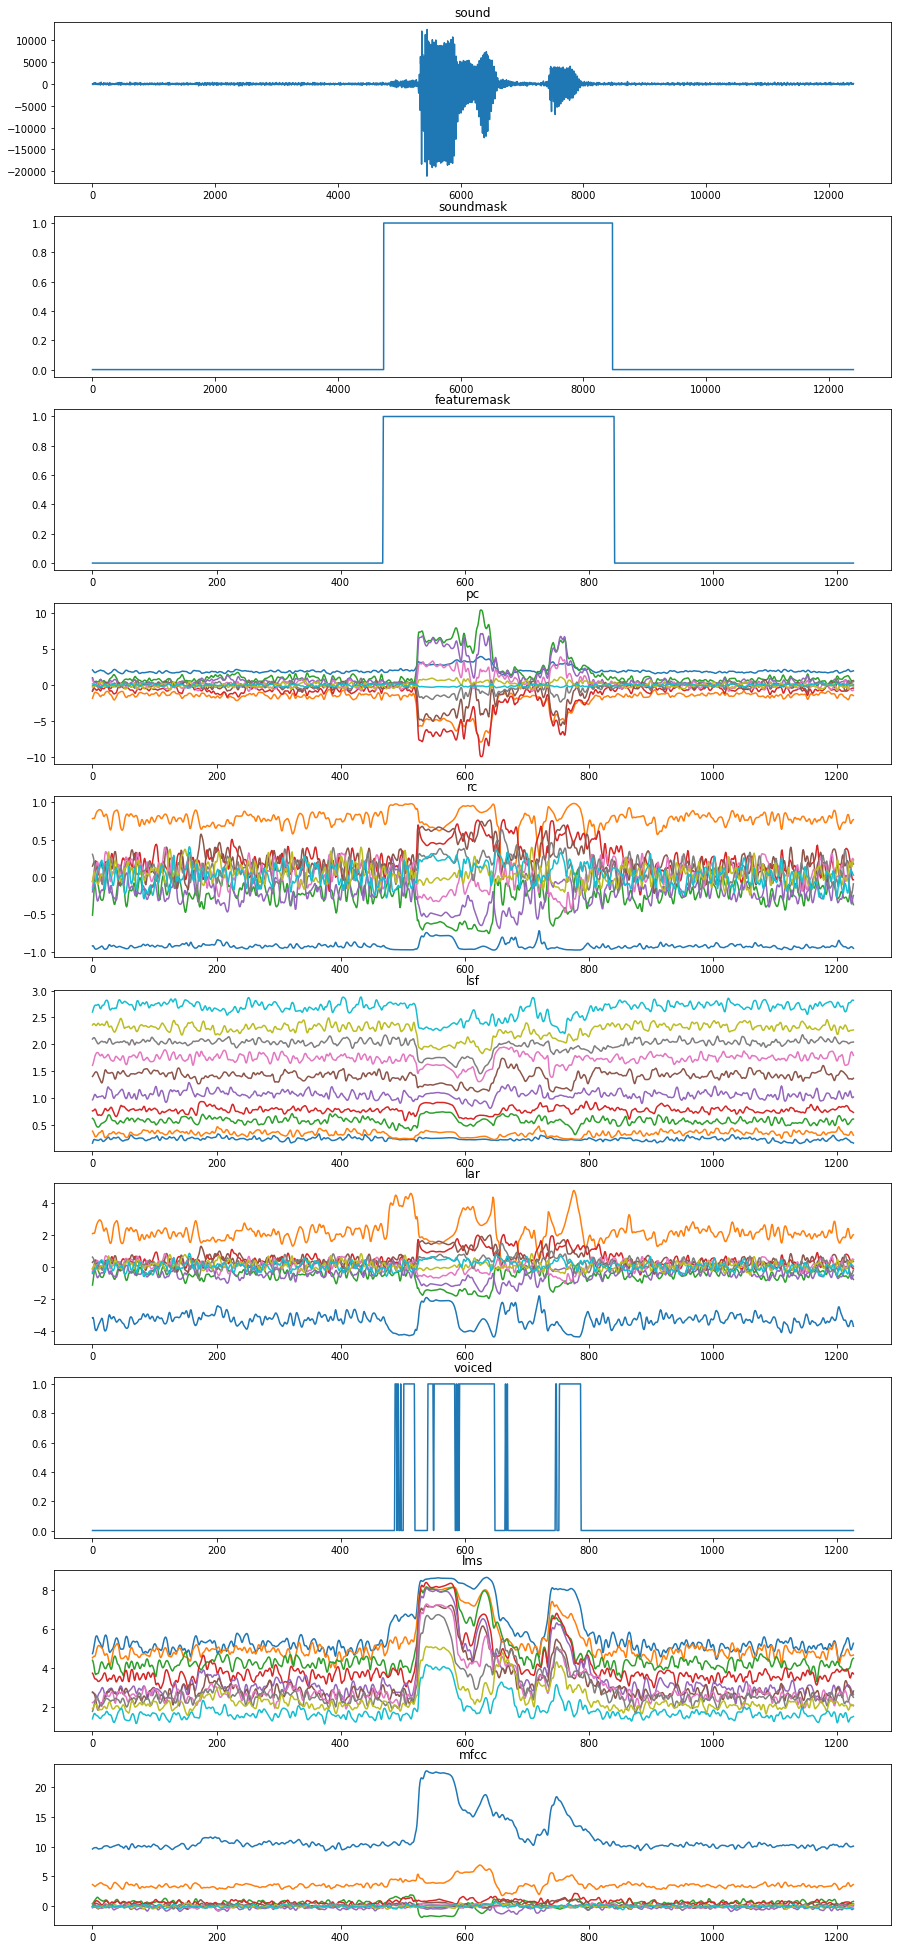

In [29]:
fig, ax = plt.subplots(len(features.keys()) - 1, 1, figsize=(15, (len(features.keys())-1)*3.5))

i = 0
for key in features.keys():
    if key == 'pitch':
        continue
    ax[i].plot(features[key])
    ax[i].set_title(key)
    i += 1
plt.show()

## Full soundf

In [13]:
%%time
features = soundfeatures.make_sound_features(soundf, fs, frame, step, pad=pad, 
                               lpc_order=lpc_order, lpc_window=lpc_window, 
                               pitch_thr=pitch_thr, 
                               soundmask_freq=soundmask_freq, soundmask_thr=soundmask_thr, 
                               n_mel=n_mel, mel_fmin=mel_fmin, mel_fmax=mel_fmax, n_mfcc=n_mfcc)

Wall time: 3min 52s


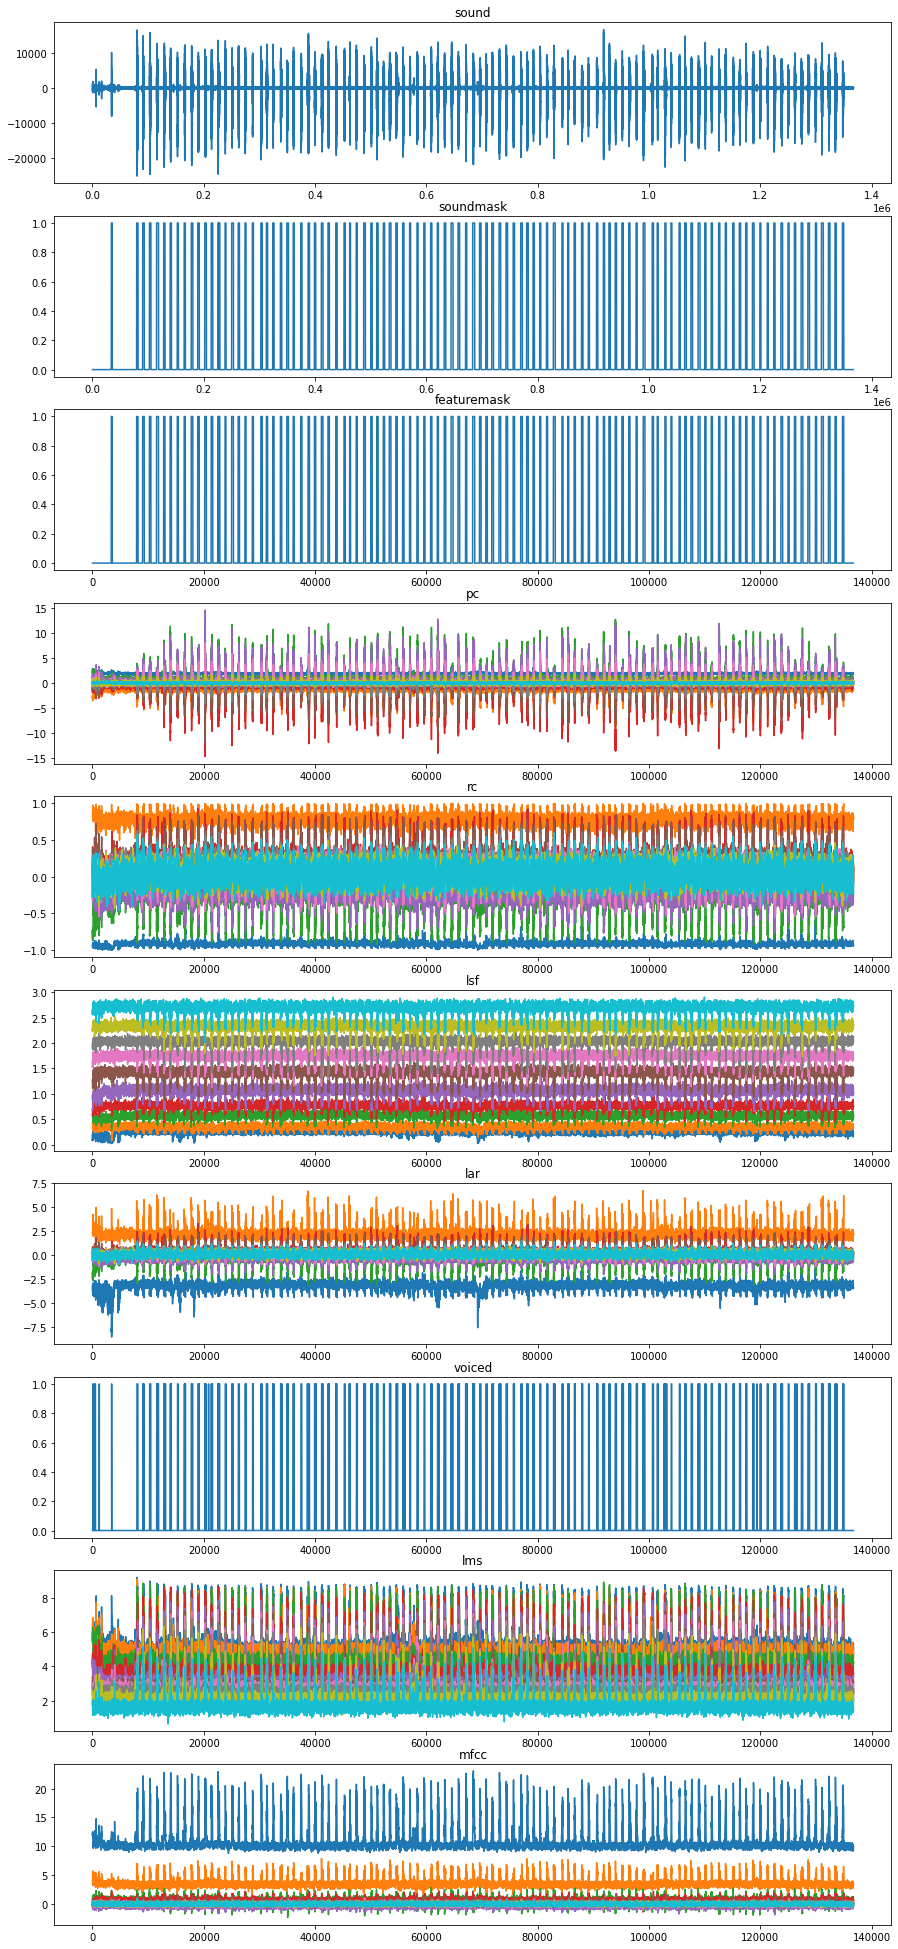

In [14]:
fig, ax = plt.subplots(len(features.keys()) - 1, 1, figsize=(15, (len(features.keys())-1)*3.5))

i = 0
for key in features.keys():
    if key == 'pitch':
        continue
    ax[i].plot(features[key])
    ax[i].set_title(key)
    i += 1
plt.show()